Back to the main [Index](../index.ipynb)

# Postprocessing tools for Many-Body calculations with ABINIT

The $GW$ code saves the results of the calculation in the `SIGRES.nc` file produced at the end of the `SIGMA` run (`optdriver` 4).
The Bethe-Salpeter code saves the optical spectra in the `MDF.nc` file. 
In this notebook, we will explain how to use `abipy` and `matplotlib` to visualize the results produce by the Many-Body code. 
Let's start by importing the basic modules we'll use for this tutorial.

In [11]:
from __future__ import division, print_function, unicode_literals

import abipy.data as abidata

from abipy import abilab
from abipy.abilab import abiopen

# This line configures matplotlib to show figures embedded in the notebook, 
# instead of poping up a new window. 
%matplotlib notebook

## How to visualize QP corrections  

<IPython.core.display.Javascript object>


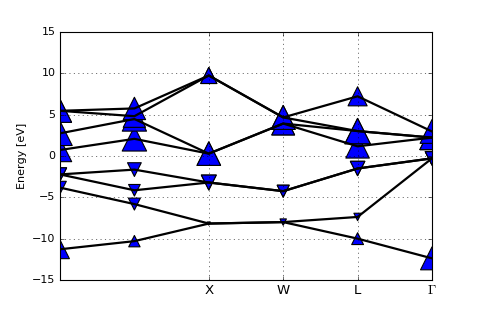

In [12]:
sigma_file = abiopen(abidata.ref_file("tgw1_9o_DS4_SIGRES.nc"))

# Plot the KS energies with markers whose size is proportional to the difference E_GW - E_KS 
# Multiply the difference by 1000 to make the markers more visible.
figure = sigma_file.plot_ksbands_with_qpmarkers(qpattr="qpeme0", fact=1000)

<IPython.core.display.Javascript object>


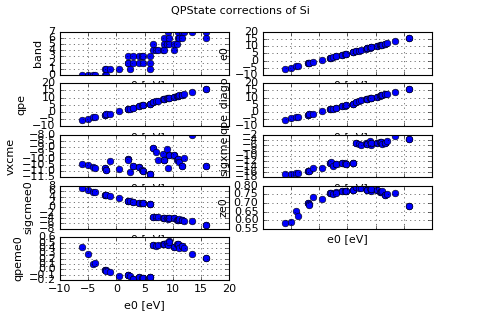

In [13]:
qplist_spin = sigma_file.qplist_spin
figure = qplist_spin[0].plot_qps_vs_e0(title="QPState corrections of Si",                                        exclude_fields="vUme")

In [14]:
sigma_file.close()

## Convergence of the QP corrections  

This example shows how to visualize the convergence of the QP results stored in the `SIGRES` produced by the $GW$ code (sigma run).

<IPython.core.display.Javascript object>


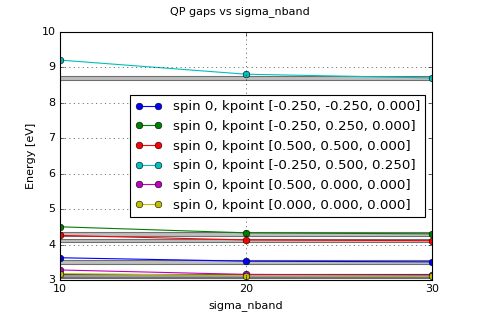

In [15]:
# List of SIGRES files computed with different values of nband.
filenames = [
    "si_g0w0ppm_nband10_SIGRES.nc",
    "si_g0w0ppm_nband20_SIGRES.nc",
    "si_g0w0ppm_nband30_SIGRES.nc",
]

filepaths = [abidata.ref_file(fname) for fname in filenames]

# Instantiate the plotter and add the filepaths to the plotter.
plotter = abilab.SigresPlotter()
plotter.add_files(filepaths)

# Plot the convergence of the QP gaps.
figure = plotter.plot_qpgaps(title="QP gaps vs sigma_nband", hspan=0.05)

# Plot the convergence of the QP energies.
#plotter.plot_qpenes(title="QP energies vs sigma_nband", hspan=0.05)

<IPython.core.display.Javascript object>


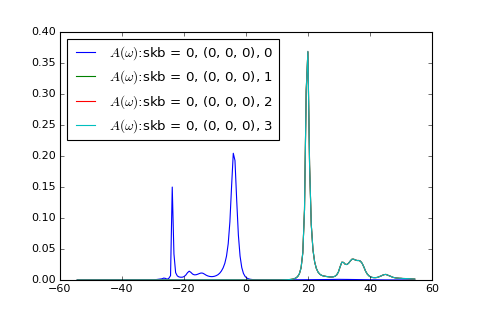

In [16]:
# This examples shows how to plot the G0W0 spectral functions A(w)
# at the gamma point, for the first band). See lesson tgw2_4

# Open the file with the GW results
sigma_file = abiopen(abidata.ref_file("al_g0w0_sigmaw_SIGRES.nc"))

# Plot A(w) for the first spin, the gamma point, and bands in [0,1,2,3]
sigma_file.plot_spectral_functions(spin=0, kpoint=(0,0,0), bands=range(0,4))
sigma_file.close()

## Bethe-Salpeter calculations

<IPython.core.display.Javascript object>


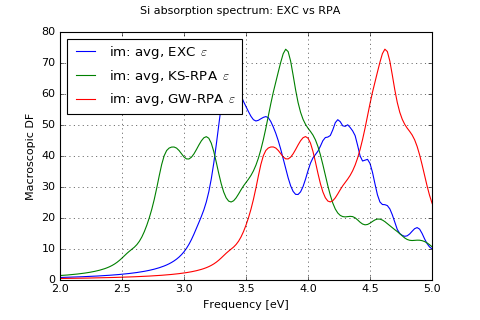

In [17]:
# Open the MDF file produced in the tutorial.
mdf_file = abiopen(abidata.ref_file("tbs_4o_DS2_MDF.nc"))

# Plot the imaginary part of the macroscopic dielectric function (EXC, RPA, GWRPA) 
# between 2 and 5 eV.
title = "Si absorption spectrum: EXC vs RPA"
mdf_file.plot_mdfs(title=title, xlim=(2, 5))

# Plot the 6 different components of the macroscopic dielectric tensor 
#title = "Si macroscopic dielectric tensor (Reduced coord)"
#tensor_exc = mdf_file.get_tensor("exc")
#tensor_exc.symmetrize()
#tensor_exc.plot(title=title)

#title = "Si macroscopic dielectric tensor (Cartesian coord)"
#tensor_exc.plot(title=title,red_coords=False)

mdf_file.close()